In [95]:
import sys

import requests
from bs4 import BeautifulSoup
import pandas

import numpy as np
import matplotlib.pyplot as plt

import pprint as pp

In [46]:
# 1. start at Ziss
url = 'https://scholar.google.co.uk/citations?user=UZ5wscMAAAAJ&hl=en'
depth=0

html = requests.get(url)

soup = BeautifulSoup(html.content, 'html.parser')
#print(soup.prettify())
print(soup.title)
print(soup.find(id='gsc_prf_in').text)

<title>Andrew Zisserman - Google Scholar Citations</title>
Andrew Zisserman


In [34]:
# 2. get citations per year
div_elems = soup.find_all('a', {"class": "gsc_g_a"})
#pp.pprint(div_elems)

cites = [(2019-len(div_elems)+i, e.text) for i, e in enumerate(div_elems, 1)]
pp.pprint(cites)

[(1994, '482'),
 (1995, '535'),
 (1996, '579'),
 (1997, '581'),
 (1998, '798'),
 (1999, '801'),
 (2000, '946'),
 (2001, '1105'),
 (2002, '1429'),
 (2003, '1670'),
 (2004, '2249'),
 (2005, '2883'),
 (2006, '3823'),
 (2007, '4574'),
 (2008, '5487'),
 (2009, '6523'),
 (2010, '7615'),
 (2011, '8134'),
 (2012, '8833'),
 (2013, '9956'),
 (2014, '11148'),
 (2015, '12143'),
 (2016, '15878'),
 (2017, '20027'),
 (2018, '26606'),
 (2019, '29529')]


In [ ]:
# 3. save name and affiliation

In [40]:
# 4. get list of co-authors
whole_co = soup.find(id='gsc_rsb_co')
cos_bigd = whole_co.find_all('span', {"class": "gsc_rsb_a_desc"})
for descriptor in cos_bigd:
    print(descriptor.a.text, ':', descriptor.a['href'])

Andrea Vedaldi : /citations?user=bRT7t28AAAAJ&hl=en&oe=ASCII
Karen Simonyan : /citations?user=L7lMQkQAAAAJ&hl=en&oe=ASCII
Josef Sivic : /citations?user=NCtKHnQAAAAJ&hl=en&oe=ASCII
Luc Van Gool : /citations?user=TwMib_QAAAAJ&hl=en&oe=ASCII
Philip Torr : /citations?user=kPxa2w0AAAAJ&hl=en&oe=ASCII
Andrew Fitzgibbon : /citations?user=73t3lIcAAAAJ&hl=en&oe=ASCII
Andrew Blake : /citations?user=tDgCcOEAAAAJ&hl=en&oe=ASCII
David Forsyth : /citations?user=5H0arvkAAAAJ&hl=en&oe=ASCII
Richard Hartley : /citations?user=cHia5p0AAAAJ&hl=en&oe=ASCII
Cordelia Schmid : /citations?user=IvqCXP4AAAAJ&hl=en&oe=ASCII
Relja Arandjelović / Реља Аранђелов... : /citations?user=VFO9h14AAAAJ&hl=en&oe=ASCII
Omkar M Parkhi : /citations?user=tiLf8UkAAAAJ&hl=en&oe=ASCII
Pietro Perona : /citations?user=j29kMCwAAAAJ&hl=en&oe=ASCII
Chris Williams : /citations?user=rvKJDbIAAAAJ&hl=en&oe=ASCII
Frederik Schaffalitzky : /citations?user=NEx2qE8AAAAJ&hl=en&oe=ASCII
Timor Kadir : /citations?user=_Tzlta0AAAAJ&hl=en&oe=ASCII
Jo

In [21]:
# 5. repeat at depth++ 
def get_data_entry(url, data_object):
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    
    # get researcher name
    name = soup.find(id='gsc_prf_in').text
    print('got: ', name)
    
    # get citations in (year, #citations) format
    cite_divs = soup.find_all('a', {"class": "gsc_g_a"})
    cites = [(2019-len(cite_divs)+i, e.text) for i, e in enumerate(cite_divs, 1)]
    
    # get co-authors as (name, url)
    try:
        whole_co = soup.find(id='gsc_rsb_co')
        cos_bigd = whole_co.find_all('span', {"class": "gsc_rsb_a_desc"})
        coa = [(d.a.text, 'https://scholar.google.co.uk'+d.a['href']) for d in cos_bigd]
    except AttributeError as e:
        print(e)
        print(name, 'has no coauths?')
        coa = []
    
    return {'name':name, 'cites':cites, 'coauths': coa}

def prune_coauths(data_object, coauths):
    unexplored_coauths = []
    explored_auths = sorted([de['name'] for de in data_object])
    #ca_name_list = sorted([ca[0] for de in data_object for ca in de['coauths']])
    for ca in coauths:
        if ca[0] not in explored_auths:
            unexplored_coauths.append(ca)
    return unexplored_coauths

def scrape(url='https://scholar.google.co.uk/citations?user=UZ5wscMAAAAJ&hl=en', data_object=[], depth=5):
    if depth < 1:
        return data_object

    new_author_data = get_data_entry(url, data_object)
    unexplored_coauths = prune_coauths(data_object, new_author_data['coauths'])
    data_object.append(new_author_data)
    
    for new_co in unexplored_coauths:
        data_object = scrape(new_co[1], data_object, depth-1)
        
    return data_object

In [16]:
data_object = scrape(depth=2)

num_auths:  0
depth:  2
got:  Andrew Zisserman
auth list:  ['Andrew Zisserman']
num_auths:  1
depth:  1
got:  Andrea Vedaldi
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi']
num_auths:  2
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi']
num_auths:  2
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi']
num_auths:  2
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi']
num_auths:  2
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi']
num_auths:  2
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi']
num_auths:  2
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi']
num_auths:  2
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi']
num_auths:  2
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi']
num_auths:  2
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi']
num_auths:  2
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi']
num_auths:  2
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi']

got:  Andrew Fitzgibbon
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon']
num_auths:  7
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon']
num_auths:  7
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon']
num_auths:  7
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon']
num_auths:  7
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon']
num_auths:  7
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon']
num_auths:  7
depth:  0
auth list:  ['An

got:  Cordelia Schmid
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon', 'Andrew Blake', 'David Forsyth', 'Richard Hartley', 'Cordelia Schmid']
num_auths:  11
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon', 'Andrew Blake', 'David Forsyth', 'Richard Hartley', 'Cordelia Schmid']
num_auths:  11
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon', 'Andrew Blake', 'David Forsyth', 'Richard Hartley', 'Cordelia Schmid']
num_auths:  11
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon', 'Andrew Blake', 'David Forsyth', 'Richard Hartley', 'Cordelia Schmid']
num_auths:  11
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi',

got:  Omkar M Parkhi
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon', 'Andrew Blake', 'David Forsyth', 'Richard Hartley', 'Cordelia Schmid', 'Relja Arandjelović / Реља Аранђеловић', 'Omkar M Parkhi']
num_auths:  13
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon', 'Andrew Blake', 'David Forsyth', 'Richard Hartley', 'Cordelia Schmid', 'Relja Arandjelović / Реља Аранђеловић', 'Omkar M Parkhi']
num_auths:  13
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon', 'Andrew Blake', 'David Forsyth', 'Richard Hartley', 'Cordelia Schmid', 'Relja Arandjelović / Реља Аранђеловић', 'Omkar M Parkhi']
num_auths:  13
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Phili

got:  Frederik Schaffalitzky
'NoneType' object has no attribute 'find_all'
Frederik Schaffalitzky has no coauths?
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon', 'Andrew Blake', 'David Forsyth', 'Richard Hartley', 'Cordelia Schmid', 'Relja Arandjelović / Реља Аранђеловић', 'Omkar M Parkhi', 'Pietro Perona', 'Chris Williams', 'Frederik Schaffalitzky']
num_auths:  16
depth:  1
got:  Timor Kadir
'NoneType' object has no attribute 'find_all'
Timor Kadir has no coauths?
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon', 'Andrew Blake', 'David Forsyth', 'Richard Hartley', 'Cordelia Schmid', 'Relja Arandjelović / Реља Аранђеловић', 'Omkar M Parkhi', 'Pietro Perona', 'Chris Williams', 'Frederik Schaffalitzky', 'Timor Kadir']
num_auths:  17
depth:  1
got:  John Winn
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen S

got:  Antonio Criminisi
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon', 'Andrew Blake', 'David Forsyth', 'Richard Hartley', 'Cordelia Schmid', 'Relja Arandjelović / Реља Аранђеловић', 'Omkar M Parkhi', 'Pietro Perona', 'Chris Williams', 'Frederik Schaffalitzky', 'Timor Kadir', 'John Winn', 'James Philbin', 'Jean Ponce', 'Antonio Criminisi']
num_auths:  21
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr', 'Andrew Fitzgibbon', 'Andrew Blake', 'David Forsyth', 'Richard Hartley', 'Cordelia Schmid', 'Relja Arandjelović / Реља Аранђеловић', 'Omkar M Parkhi', 'Pietro Perona', 'Chris Williams', 'Frederik Schaffalitzky', 'Timor Kadir', 'John Winn', 'James Philbin', 'Jean Ponce', 'Antonio Criminisi']
num_auths:  21
depth:  0
auth list:  ['Andrew Zisserman', 'Andrea Vedaldi', 'Karen Simonyan', 'Josef Sivic', 'Luc Van Gool', 'Philip Torr

In [22]:
big_do = scrape(depth=5)

got:  Andrew Zisserman
got:  Andrea Vedaldi
got:  Karen Simonyan
'NoneType' object has no attribute 'find_all'
Karen Simonyan has no coauths?
got:  Stefano Soatto
got:  Paolo Favaro
'NoneType' object has no attribute 'find_all'
Paolo Favaro has no coauths?
got:  Anthony Yezzi
got:  Allen Tannenbaum
'NoneType' object has no attribute 'find_all'
Allen Tannenbaum has no coauths?
got:  Alan S. Willsky
'NoneType' object has no attribute 'find_all'
Alan S. Willsky has no coauths?
got:  Ganesh Sundaramoorthi
'NoneType' object has no attribute 'find_all'
Ganesh Sundaramoorthi has no coauths?
got:  Francesco Fedele
got:  Guillermo Gallego
got:  Peter Olver
'NoneType' object has no attribute 'find_all'
Peter Olver has no coauths?
got:  Alvise Benetazzo
got:  Andrea C G Mennucci
got:  Hailin Jin
got:  Satyanad Kichenassamy
'NoneType' object has no attribute 'find_all'
Satyanad Kichenassamy has no coauths?
got:  Gozde Unal, PhD, Professor
'NoneType' object has no attribute 'find_all'
Gozde Unal, P

got:  Jana Tumova
got:  David Hsu
got:  Michael Otte
got:  Minghui Zhu
got:  Ameet Talwalkar
got:  Valerio Varricchio
got:  Ying Nian Wu
'NoneType' object has no attribute 'find_all'
Ying Nian Wu has no coauths?
got:  Omkar M Parkhi
got:  C. V. Jawahar
'NoneType' object has no attribute 'find_all'
C. V. Jawahar has no coauths?
got:  Relja Arandjelović / Реља Аранђеловић
got:  Josef Sivic
got:  Akihiko TORII
got:  Tomas Pajdla
got:  Ken Chatfield
'NoneType' object has no attribute 'find_all'
Ken Chatfield has no coauths?
got:  Ignacio Rocco
got:  Petr Gronat
got:  Pushmeet Kohli
got:  Krishnamurthy Dvijotham
got:  Sven Gowal
'NoneType' object has no attribute 'find_all'
Sven Gowal has no coauths?
got:  Yujie Zhong
got:  METIN SEZGIN
got:  Timothy A Mann
got:  Rudy Bunel
got:  Brendan O'Donoghue
got:  Mircea Cimpoi
got:  Joon Son Chung
'NoneType' object has no attribute 'find_all'
Joon Son Chung has no coauths?
got:  Victor Lempitsky
'NoneType' object has no attribute 'find_all'
Victor L

got:  Edin Golubovic
got:  Eray Baran
got:  Metin Gokasan
'NoneType' object has no attribute 'find_all'
Metin Gokasan has no coauths?
got:  Islam S. M. Khalil
got:  Khalid ABIDI
got:  Okyay Kaynak
got:  Tarik Uzunovic
got:  Emre Ozsoy
got:  Seta Bogosyan
'NoneType' object has no attribute 'find_all'
Seta Bogosyan has no coauths?
got:  Meltem Elitas
got:  Ahmet Teoman Naskali
got:  Akhtar Rasool
got:  Zhenishbek Zhakypov
got:  Selim Yannier (Ph.D.)
'NoneType' object has no attribute 'find_all'
Selim Yannier (Ph.D.) has no coauths?
got:  Miran Rodic
got:  Leonid Fridman
got:  Devrim Gozuacik
got:  Yunus Akkoc
got:  Gözde Korkmaz
'NoneType' object has no attribute 'find_all'
Gözde Korkmaz has no coauths?
got:  Ayse Kumsal Tekirdag Kosar, PhD.
'NoneType' object has no attribute 'find_all'
Ayse Kumsal Tekirdag Kosar, PhD. has no coauths?
got:  galit Shohat Ophir
'NoneType' object has no attribute 'find_all'
galit Shohat Ophir has no coauths?
got:  Marc le Maire
got:  Marie-Lise GOUGEON
got:

got:  Aruni RoyChowdhury
got:  Ujjwal Bhattacharya
got:  Swapan Kumar Parui
got:  Haoxiang Li
got:  Gang Hua
got:  Rakesh R Menon
got:  Pia Bideau
got:  SouYoung Jin
got:  Deep Chakraborty
got:  Daniel Sheldon
'NoneType' object has no attribute 'find_all'
Daniel Sheldon has no coauths?
got:  Liangliang Cao
got:  Prithvijit Chakrabarty
'NoneType' object has no attribute 'find_all'
Prithvijit Chakrabarty has no coauths?
got:  Ashish Singh
got:  Alexander C Berg
'NoneType' object has no attribute 'find_all'
Alexander C Berg has no coauths?
got:  Hang Su
got:  Varun Jampani
got:  Jan Kautz
got:  Ming-Hsuan Yang
got:  Genevieve Patterson
got:  Chris Stauffer
got:  Orazio Gallo
'NoneType' object has no attribute 'find_all'
Orazio Gallo has no coauths?
got:  Esa Rahtu
got:  Juho Kannala
got:  Janne Heikkilä
'NoneType' object has no attribute 'find_all'
Janne Heikkilä has no coauths?
got:  Mikko Salo
'NoneType' object has no attribute 'find_all'
Mikko Salo has no coauths?
got:  Matthew Blaschk

got:  Peter Battaglia
got:  Sébastien Racanière
got:  Razvan Pascanu
got:  Diederik P. Kingma
got:  Shakir Mohamed
got:  Balaji Lakshminarayanan
got:  Mihaela Rosca
got:  Tshilidzi Marwala
got:  Katherine Heller
'NoneType' object has no attribute 'find_all'
Katherine Heller has no coauths?
got:  Nando de Freitas
got:  Mohammad Emtiyaz Khan
got:  Kevin Murphy
'NoneType' object has no attribute 'find_all'
Kevin Murphy has no coauths?
got:  Fulufhelo Nelwamondo
got:  Finale Doshi
'NoneType' object has no attribute 'find_all'
Finale Doshi has no coauths?
got:  Ziyu Wang
got:  David A. Knowles
got:  Marc Deisenroth
got:  Benjamin M. Marlin
got:  Mikkel N. Schmidt
got:  Peter Battaglia
got:  Jessica B. Hamrick
got:  Joshua B. Tenenbaum
got:  Adam Santoro
got:  David Raposo
got:  Yujia Li
'NoneType' object has no attribute 'find_all'
Yujia Li has no coauths?
got:  Paul Schrater
got:  Richard Aslin
'NoneType' object has no attribute 'find_all'
Richard Aslin has no coauths?
got:  Robert Jacobs


got:  Shigeki Sugimoto
got:  Masao Shimizu
got:  Yusuke Monno
got:  Takeo Kanade
'NoneType' object has no attribute 'find_all'
Takeo Kanade has no coauths?
got:  Daisuke Kiku
got:  Yinqiang Zheng
'NoneType' object has no attribute 'find_all'
Yinqiang Zheng has no coauths?
got:  Takashi Shibata
got:  Xinhao LIU
got:  Tomomasa Goto
got:  Akihito Seki
got:  Samuel Audet
'NoneType' object has no attribute 'find_all'
Samuel Audet has no coauths?
got:  Yasuhiro KATAYAMA
got:  Shuicheng Yan, 颜水成
got:  Relja Arandjelović / Реља Аранђеловић
got:  Ankush Gupta
got:  Karen Simonyan
'NoneType' object has no attribute 'find_all'
Karen Simonyan has no coauths?
got:  Josef Sivic
got:  Ivan Laptev
got:  Tony Lindeberg
'NoneType' object has no attribute 'find_all'
Tony Lindeberg has no coauths?
got:  patrick pérez
got:  Etienne Mémin
got:  Christophe Collet
'NoneType' object has no attribute 'find_all'
Christophe Collet has no coauths?
got:  Fabrice Heitz
got:  Hervé Jégou
got:  Max Mignotte
got:  Chri

SSLError: HTTPSConnectionPool(host='scholar.google.co.uk', port=443): Max retries exceeded with url: /citations?user=2QbbLJAAAAAJ&hl=en&oe=ASCII (Caused by SSLError(SSLError("bad handshake: SysCallError(50, 'ENETDOWN')")))

In [134]:
def get_author_data(url):
    try:
        html = requests.get(url)
    except SSLError as e:
        print(e)
        return None, None
    
    soup = BeautifulSoup(html.content, 'html.parser')
    
    # get researcher name
    name = soup.find(id='gsc_prf_in').text
    
    # get citations in (year, #citations) format
    cite_divs = soup.find_all('a', {"class": "gsc_g_a"})
    #cites = [(2019-len(cite_divs)+i, e.text) for i, e in enumerate(cite_divs, 1)]
    cites = [e.text for e in cite_divs]
    #cites = {[e.text for e in cite_divs]}
    
    # get co-authors as (name, url)
    try:
        whole_co = soup.find(id='gsc_rsb_co')
        cos_bigd = whole_co.find_all('span', {"class": "gsc_rsb_a_desc"})
        #co_auths = [(d.a.text, 'https://scholar.google.co.uk'+d.a['href']) for d in cos_bigd]
        co_auths = {'name':[], 'url':[]}
        for d in cos_bigd:
            co_auths['name'].append(d.a.text)
            co_auths['url'].append('https://scholar.google.co.uk'+d.a['href'])
        co_auths = pandas.DataFrame(co_auths)
    except AttributeError as e:
        print(e)
        print(name, 'has no coauths?')
        co_auths = None
        
    return cites, co_auths


def build_citation_frame_dict(auth_meta, citations):
    years_to_track = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009]
    if len(citations) < len(years_to_track):
        citations.
    ret_dict = {'name': auth_meta['name'], 'active_since': 2019-len(citations)+1, 'affiliation': None}
    for year in years_to_track:
        ret_dict[year] = citations[year]
    for idx, elem in enumerate(citations[::-1]):
        if idx > len(years_to_track):
            break
        ret_dict[2019-idx] = elem
    return ret_dict


def grow_dataframe(citation_frame, unexplored_auths):
    # for each person in unexplored_auths
    # get their info (citations, co-authors)
    # append to citation_frame
    # update unexplored_auths to include discovered co-auths which aren't in either table already
    all_auths = pandas.DataFrame()

    for idx, row in unexplored_auths.iterrows():
        print('getting:', row['name'])
        citations, co_auths = get_author_data(row['url'])
        if citations is None:
            continue
        new_auth_data = build_citation_frame_dict(row, citations)
        citation_frame = citation_frame.append(new_auth_data, ignore_index=True)
        
        if co_auths is None:
            continue
        all_auths = all_auths.append(co_auths, ignore_index=True)
        
    all_auths.drop_duplicates(subset='name', keep=False, inplace=True)
        
    return citation_frame, all_auths

In [70]:
### BETTER GET A METHOD THAT ITERATIVELY UPDATES ADDS TO A DATAFRAME OR TABLE
# new goals:
# get all this info you were getting, but in a dataframe, and with a nice try catch to not delete the whole object
# keep track of "authors mined", "co-authors unmined"
# 
years_to_track = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009]
cols = ['name', 'url', 'affiliation', 'active_since'] + years_to_track
citation_frame = pandas.DataFrame(columns=cols)
#citation_data.append({'name': 'bob', 'active_since': 1993}, ignore_index=True)

unexplored_auths = pandas.DataFrame(columns=['name', 'url'])
unexplored_auths = unexplored_auths.append({'name': 'Andrew Zisserman', 
                                            'url': 'https://scholar.google.co.uk/citations?user=UZ5wscMAAAAJ&hl=en'}, ignore_index=True)
#print(unexplored_auths)

num_grows = 2
for i in range(num_grows):
    citation_frame, unexplored_auths = grow_dataframe(citation_frame, unexplored_auths)

getting: Andrew Zisserman
getting: Andrea Vedaldi
getting: Karen Simonyan
'NoneType' object has no attribute 'find_all'
Karen Simonyan has no coauths?
getting: Josef Sivic
getting: Luc Van Gool
getting: Philip Torr
getting: Andrew Fitzgibbon
getting: Andrew Blake
getting: David Forsyth
'NoneType' object has no attribute 'find_all'
David Forsyth has no coauths?
getting: Richard Hartley
getting: Cordelia Schmid
getting: Relja Arandjelović / Реља Аранђелов...
getting: Omkar M Parkhi
getting: Chris Williams
getting: Pietro Perona
getting: Frederik Schaffalitzky
'NoneType' object has no attribute 'find_all'
Frederik Schaffalitzky has no coauths?
getting: Timor Kadir
'NoneType' object has no attribute 'find_all'
Timor Kadir has no coauths?
getting: John Winn
getting: James Philbin
'NoneType' object has no attribute 'find_all'
James Philbin has no coauths?
getting: Jean Ponce
getting: Antonio Criminisi


In [138]:
citation_frame

,name,url,affiliation,active_since,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
0,Andrew Zisserman,NaN,None,1994,29890,26603,20007,15879,12112,11134,9943,8823,8124,7597,6518,5484
1,Andrea Vedaldi,NaN,None,2008,8464,7418,5788,4334,2566,1817,1131,880,536,361,180,90
2,Karen Simonyan,NaN,None,2014,21065,16514,9015,4465,1419,250,NaN,NaN,NaN,NaN,NaN,NaN
3,Josef Sivic,NaN,None,2005,3355,3179,2949,2969,2800,2571,2266,1857,1628,1434,1048,678
4,Luc Van Gool,NaN,None,1998,13418,12797,11211,10819,9911,9370,8441,7221,6202,5126,3880,2910
5,Philip Torr,NaN,None,1997,6148,5165,4083,3506,2671,2288,1915,1611,1492,1422,1256,1081
6,Andrew Fitzgibbon,NaN,None,1998,2754,3491,3569,3622,3318,3106,2610,2018,1294,1128,1049,951
7,Andrew Blake,NaN,None,1990,1939,2546,3026,3392,3573,3657,3628,3419,2877,2830,2626,2517
8,David Forsyth,NaN,None,1993,1646,1772,1907,2062,1973,2197,2101,2124,1978,1963,1822,1783
9,Richard Hartley,NaN,None,1994,2939,3334,3451,3720,3689,3808,3617,3479,3392,3356,2943,2744


In [72]:
unexplored_auths

,name,url
4,João F. Henriques,https://scholar.google.co.uk/citations?user=aC...
5,Hakan Bilen,https://scholar.google.co.uk/citations?user=Pt...
6,Brian Fulkerson,https://scholar.google.co.uk/citations?user=JI...
8,Karel Lenc,https://scholar.google.co.uk/citations?user=Ht...
9,Subhransu Maji,https://scholar.google.co.uk/citations?user=l7...
12,Max Jaderberg,https://scholar.google.co.uk/citations?user=Je...
13,Dmitry Ulyanov,https://scholar.google.co.uk/citations?user=g9...
14,Aravindh Mahendran,https://scholar.google.co.uk/citations?user=lA...
15,Iasonas Kokkinos,https://scholar.google.co.uk/citations?user=ZO...
17,Jack Valmadre,https://scholar.google.co.uk/citations?user=_V...


In [132]:
#### analysis on the citation data
# measure:
# how fast they are growing by fitting a polynomial degree
# do that by fitting a line in log space
def minpoly(cites):
    log_cites = np.log(cites+1)
    indexes = np.log(np.arange(len(log_cites))+1.4)
    p = np.polyfit(indexes, log_cites, deg=1)
    print(log_cites)
    print(p)
    return p

n_test = 20
c_test = np.array([(i+1)**2 for i in range(n_test)])
m, c = minpoly(c_test)
print(np.exp(m))

[0.69314718 1.60943791 2.30258509 2.83321334 3.25809654 3.61091791
 3.91202301 4.17438727 4.40671925 4.61512052 4.80402104 4.97673374
 5.13579844 5.28320373 5.420535   5.54907608 5.66988092 5.78382518
 5.89164421 5.99396143]
[ 2.02066121 -0.11562615]
7.543311029528074


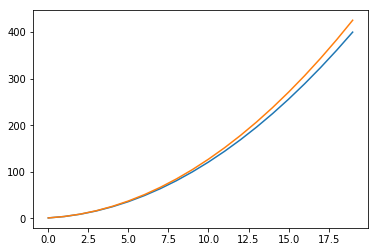

In [133]:
plt.plot(np.arange(n_test), c_test)
plt.plot(np.arange(n_test), np.array([(i+1)**m for i in range(n_test)]))

In [142]:
def generate_exponent_df(citation_df):
    cites_only = citation_df[citation_df.columns[4:]]
    cites_np = cites_only.to_numpy()
    for row in cites_np.split():
        print(row)

generate_exponent_df(citation_frame)

AttributeError: 'numpy.ndarray' object has no attribute 'split'